In [1]:
import pickle as pkl
import seaborn as sns
import matplotlib.pyplot as plt
import re
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import math

from tqdm import tqdm_notebook
from collections import Counter
from glob import glob

%matplotlib inline

sns.set(style="darkgrid")

In [2]:
PATH = '../'

PROCESSED_DATA_PATH = os.path.join(PATH, 'data/processed/')

DF_FAKE_PATH = glob(PROCESSED_DATA_PATH + '*')[0]
DF_LEGIT_PATH = glob(PROCESSED_DATA_PATH + '*')[1]

In [3]:
df_fake = pkl.load(open(DF_FAKE_PATH, 'rb'))

df_legit = pkl.load(open(DF_LEGIT_PATH, 'rb'))

In [4]:
df = pd.concat((df_fake, df_legit), axis=0)

In [5]:
classes = [True, False]

In [6]:
df['TEXT_LEN_CHAR'] = df['TEXT_CLEAN'].apply(len)
df['TEXT_LEN_TOKEN'] = df['TEXT_CLEAN'].apply(str.split).apply(len)
df['TITLE_LEN_CHAR'] = df['TITLE_CLEAN'].apply(len)
df['TITLE_LEN_TOKEN'] = df['TITLE_CLEAN'].apply(str.split).apply(len)

In [7]:
df.head()

,DATE,FAKE,TEXT_CLEAN,TITLE_CLEAN,TEXT_LEN_CHAR,TEXT_LEN_TOKEN,TITLE_LEN_CHAR,TITLE_LEN_TOKEN
0,03/08/2019,True,vamos assinar peticao cassacao mandato bolsona...,peticao impeachment bolsonaro precisa milhoes ...,328,36,81,9
1,04/08/2019,True,lula vitima golpe politico merece estar preso ...,peticao lula livre contribui liberdade preside...,242,30,54,7
2,05/08/2019,True,professor contou dilma matou mario kozel filho...,mario kozel filho assassinado dilma tiros,170,24,41,6
3,03/08/2019,True,vergonha presidente oab mentiu pai morto milit...,felipe santa cruz presidente oab mentiu sobre ...,158,25,82,13
4,06/08/2019,True,partido diabolico bandidos abrindo buracos est...,esquerda abrindo buracos estradas nordeste con...,155,19,59,7


In [8]:
all_cnt = {}
for key in tqdm_notebook(classes):
    cnt = Counter()
    for text in tqdm_notebook(df[df['FAKE'] == key]['TEXT_CLEAN']):
        cnt += Counter(set(str(text).split()))

    all_cnt[key] = cnt.most_common()

In [9]:
def get_from_sublist(wrd, counter):
    lst = [elem[0] for elem in counter]
    if wrd in lst:
        return True, counter[lst.index(wrd)][1]
    return False, -1
        

In [10]:
n = 10
for key1 in all_cnt:
    print('========== {} ========== '.format(key1))
    total = len(df[df['FAKE'] == key1]['TEXT_CLEAN'])
    for wrd in all_cnt[key1][:n]:
        print('{}: {}/{} ({}%)'.format(wrd[0].upper(), wrd[1], total, round(wrd[1]/total * 100, 2)))
        lst = []
        for key2 in all_cnt:
            cond, val = get_from_sublist(wrd[0], all_cnt[key2])
            if key1 != key2 and cond:
                lst.append((wrd[0], val, key2))
        for item in sorted(lst, key=lambda x: -x[1]):
            print(' - {} documentos em {}'.format(item[1], item[2]))
                
        print()
    print()

========== True ========== 
BRASIL: 336/1251 (26.86%)
 - 5447 documentos em False

PRESIDENTE: 288/1251 (23.02%)
 - 10910 documentos em False

LULA: 265/1251 (21.18%)
 - 2239 documentos em False

BOLSONARO: 263/1251 (21.02%)
 - 1891 documentos em False

SER: 238/1251 (19.02%)
 - 10884 documentos em False

BOATO: 222/1251 (17.75%)
 - 35 documentos em False

VAI: 216/1251 (17.27%)
 - 4732 documentos em False

DIZ: 179/1251 (14.31%)
 - 4657 documentos em False

TODOS: 175/1251 (13.99%)
 - 6263 documentos em False

DILMA: 169/1251 (13.51%)
 - 3084 documentos em False


========== False ========== 
PRESIDENTE: 10910/15705 (69.47%)
 - 288 documentos em True

SER: 10884/15705 (69.3%)
 - 238 documentos em True

SOBRE: 9940/15705 (63.29%)
 - 151 documentos em True

FEIRA: 9537/15705 (60.73%)
 - 72 documentos em True

GOVERNO: 9461/15705 (60.24%)
 - 147 documentos em True

PAIS: 9100/15705 (57.94%)
 - 158 documentos em True

SEGUNDO: 9086/15705 (57.85%)
 - 88 documentos em True

AINDA: 9065/1570

In [11]:
def get_size(cls):
    return len(df[df['FAKE'] == cls])

1000
10


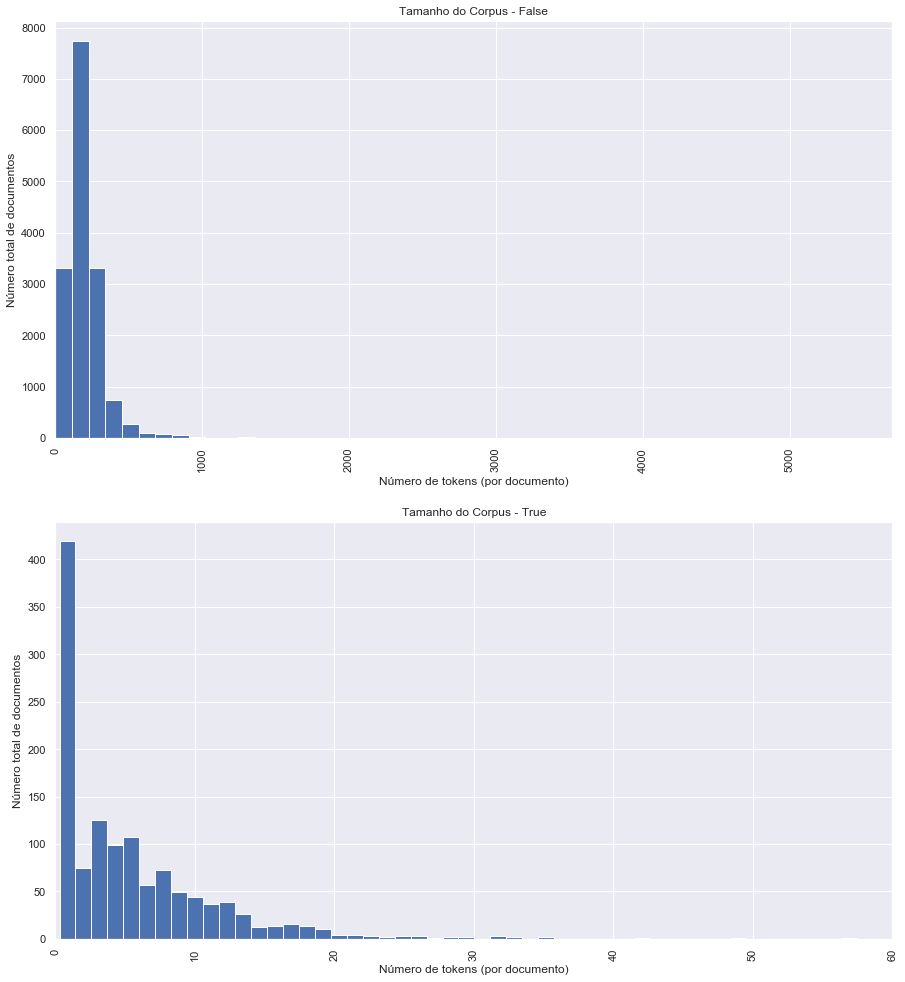

In [12]:

fig, ax = plt.subplots(2, 1, figsize=(15, 10))
fig.subplots_adjust(top=1.4)
for i, cls in enumerate(sorted(classes, key=get_size, reverse=True)):
#     n_bins = 2 * len(set(df[df['FAKE'] == cls]['TEXT_LEN_TOKEN'].apply(lambda x: round(x / 100) * 100)))
    n_bins = 50
    x_min = math.floor(min(df[df['FAKE'] == cls]['TEXT_LEN_TOKEN']) / 100) * 100
    x_max = math.ceil(max(df[df['FAKE'] == cls]['TEXT_LEN_TOKEN']) / 100) * 100
    x_step = int(math.pow(10, math.ceil(math.log(math.floor((x_max - x_min) / 100), 10))))
    print(x_step)
    ax[i].set(xlim=(x_min, x_max))
    ax[i].hist(df[df['FAKE'] == cls]['TEXT_LEN_TOKEN'], bins=n_bins, align='mid')
    ax[i].set_xticklabels(range(x_min, x_max, x_step), rotation=90)
    
    ax[i].set_title('Tamanho do Corpus - {}'.format(cls))
    ax[i].set_xlabel('Número de tokens (por documento)');
    ax[i].set_ylabel('Número total de documentos');

In [14]:
df_fake['TEXT_CLEAN'].apply(str.split).apply(len).mean()

56.093525179856115

In [16]:
df_legit['TEXT_CLEAN'].apply(str.split).apply(len).mean()

403.2422795288125

In [18]:
max(df_fake['TEXT_CLEAN'].apply(str.split).apply(len))

575

In [19]:
max(df_legit['TEXT_CLEAN'].apply(str.split).apply(len))

11334

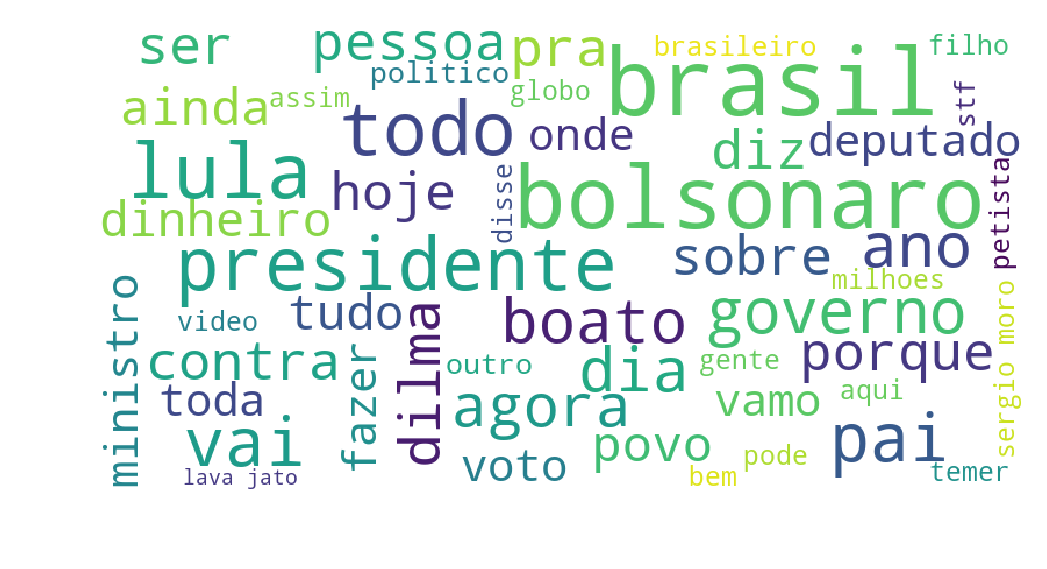

In [28]:
from wordcloud import WordCloud

data = [wrd for lst in df_fake['TEXT_CLEAN'] for wrd in lst.split()]
wordcloud = WordCloud(
                    background_color='white',
                    max_words=50,
                    max_font_size=80, 
                    random_state=42,
                    height=400,
                    width=800
                    ).generate(' '.join(data))

print(wordcloud)
fig = plt.figure(1, dpi=200)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
# fig.savefig("plots/word1.png", dpi=900)

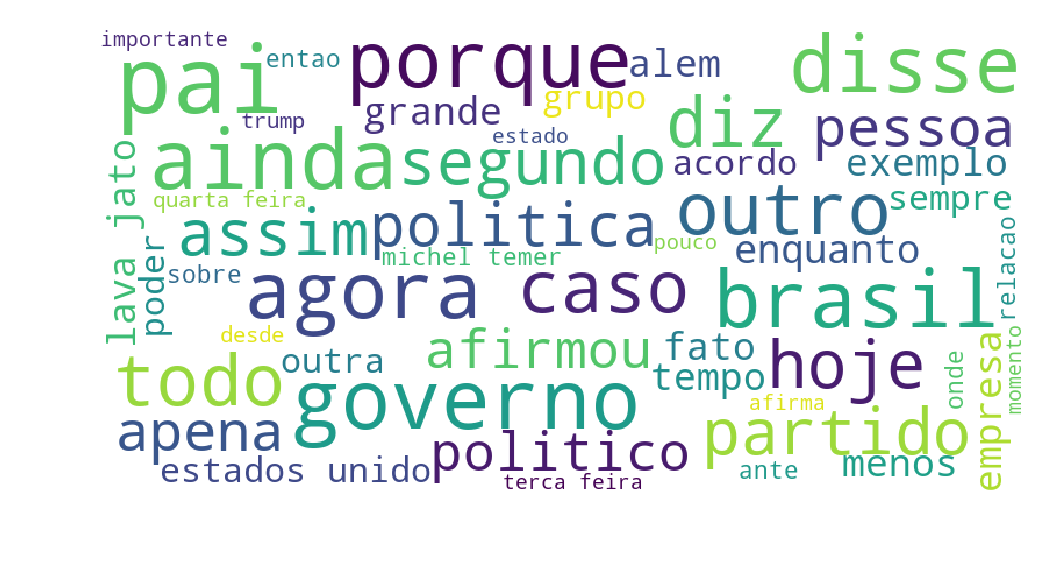

In [30]:
data = [wrd for lst in df_legit['TEXT_CLEAN'] for wrd in lst.split()]
wordcloud = WordCloud(
                    background_color='white',
                    max_words=50,
                    max_font_size=80, 
                    random_state=42,
                    height=400,
                    width=800
                    ).generate(' '.join(data))

print(wordcloud)
fig = plt.figure(1, dpi=200)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()